<a href="https://colab.research.google.com/github/AnalyticsLover/Oxford-Happiness-Questionnaire-Analysis/blob/main/OHQ_Reporte_Analitico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='navy'><u>**Reporte anal√≠tico: El "Bien Estar" del Consejo Provincial de Educaci√≥n del Neuqu√©n**<a class="anchor" id="Plan"></a></font></u>
<font color='gray'><u>*Proyecto orquestrado por Dr. Pereyra Eugenio*<a class="anchor" id="Plan"></a></font></u>

<font color='gray'><u>*An√°lisis realizado por Pardini Lucia*<a class="anchor" id="Plan"></a></font></u>

---

#### **Descripci√≥n**

El siguiente reporte incluye informaci√≥n sobre la interpretaci√≥n anal√≠tica de los resultados dados de luego realizado el cuestionario de la felicidad de la escuela de Oxford [(Oxford Happiness Questionnaire = OHQ)(Hills & Argyle, 2002)](https://psiquiatria.com/trabajos/usr_458986386152.pdf) en un cierto n√∫mero de los empleados y colaboradores del Consejo Provincial de Educacion del Neuqu√©n.

El OHQ es un cuestionario de 29 √≠tems que se punt√∫an mediante una escala tipo Likert de seis puntos, desde ‚Äútotalmente en desacuerdo‚Äù (1) a ‚Äútotalmente de acuerdo‚Äù (6), de manera que las posibles puntuaciones totales presentan un rango de 29 a 174, correspondiendo las puntuaciones m√°s altas a mayores niveles de bienestar subjetivo.

#### **Diccionario de datos**

El set de datos utilizado para la investigaci√≥n y an√°lisis contiene 32 columnas y 125 registros. Contempla los resultados de los individuos que completaron el cuestionario, la interpretaci√≥n de esos resultados y su categorizaci√≥n.

El set de datos es una **MUESTRA REPRESENTATIVA de la POBLACI√ìN** la cual es objeto de estudio, tener en cuenta que solo una parte de la poblaci√≥n (trabajadores del consejo) han sido encuestados y se han recolectado sus datos.

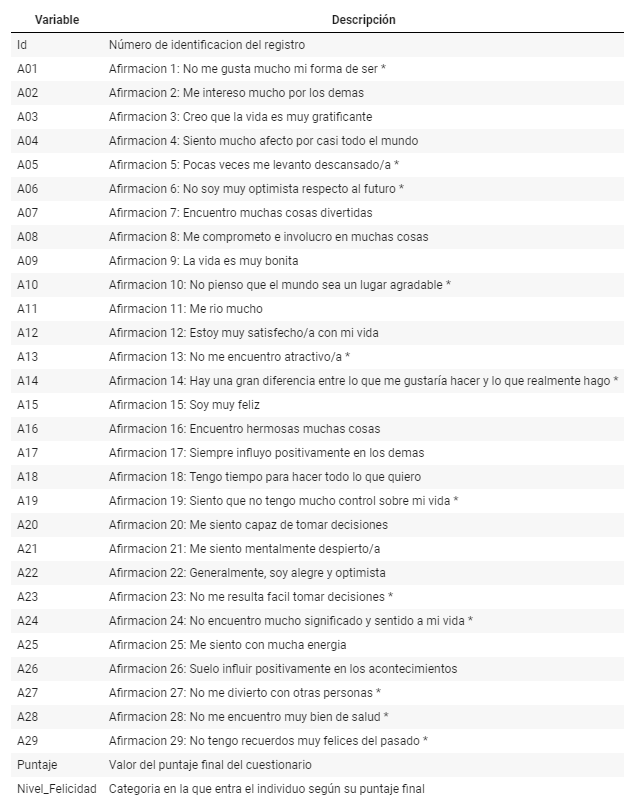

El procesamiento, limpieza y estructuraci√≥n de los datos fueron realizados aparte, resultando en el archivo csv final utilizado en este reporte para el an√°lisis.

[Ver el c√≥digo aqu√≠.](https://github.com/AnalyticsLover/Oxford-Happiness-Questionnaire-Analysis/blob/main/OHQ_cleaning_data.py)

#### **Pasos tomados para calcular el puntaje de felicidad**

  ‚úÖ Los items (columnas) marcados con "*" fueron puntuados al rev√©s:

  Se cambi√≥ ‚Äú2‚Ä≥ a ‚Äú5‚Ä≥

  Se cambi√≥  ‚Äú3‚Ä≥ a ‚Äú4‚Ä≥

  Se cambi√≥  ‚Äú4‚Ä≥ a ‚Äú3‚Ä≥

  Se cambi√≥  ‚Äú5‚Ä≥ a ‚Äú2‚Ä≥

  Se cambi√≥  ‚Äú6‚Ä≥ a ‚Äú1‚Ä≥

  ‚úÖ Se sumaron los n√∫meros de todas las 29 afirmaciones (usando los n√∫meros convertidos)



  ‚úÖ Se dividi√≥ por el total de afirmaciones. Entonces el puntaje de felicidad = el total de numeros / 29





  ‚úÖ Se interpretaron los resultados de los puntajes de felicidad seg√∫n la siguiente tabla:

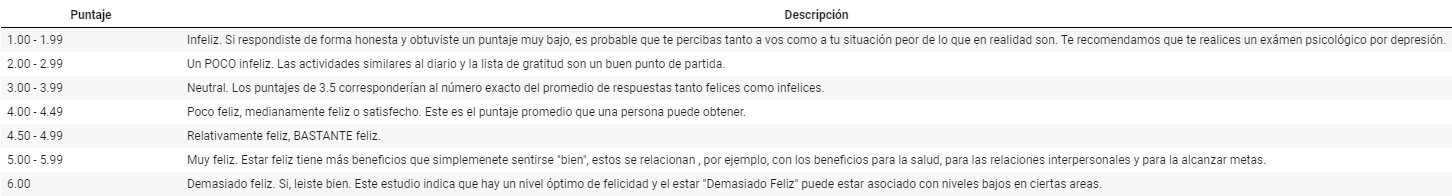
[Fuente de la tabla interpretativa](https://therapydave.com/docs/oxford-happiness-questionnaire.pdf)




### **An√°lisis Exploratorio de Datos (EDA)**


---

‚Ü™ Se vi√≥ la distribuci√≥n de los datos por cada columna.

‚Ü™ Se calcul√≥ y analiz√≥ el coeficiente de variacion en cada columna.

‚Ü™ Se calcul√≥ el standard error y confidence intervals para todas las columnas.

‚Ü™ Se vieron posibles correlaciones entre variables.

‚Ü™ Se buscaron tendencias y patrones en los datos.

‚Ü™ Se vieron los promedios, percentiles y valores minimos y maximos en los datos.




```
# importando los paquetes necesarios
```



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import t



```
# leyendo el archivo csv, pasandolo a un DataFrame y viendo su estructura
```



In [ ]:
ohq_df = pd.read_csv("/content/2024_11_OHQ_DatosLimpios.csv")

In [ ]:
ohq_df.head()

Id  A01  A02  A03  A04  A05  A06  A07  A08  A09  ...  A22  A23  A24  A25  \
0   1    2    2    5    4    5    6    5    5    5  ...    5    5    6    4   
1   2    6    6    6    6    6    6    6    6    6  ...    6    6    6    6   
2   3    6    3    6    3    3    6    5    4    6  ...    6    5    6    5   
3   4    5    6    5    5    1    6    5    5    5  ...    5    5    6    6   
4   5    2    5    5    4    1    6    5    5    6  ...    5    5    6    5   

   A26  A27  A28  A29   Puntaje          Nivel_Felicidad  
0    5    5    6    2  4.551724      Relativamente feliz  
1    6    6    6    6  5.965517                Muy feliz  
2    1    6    6    6  5.034483                Muy feliz  
3    6    2    5    6  5.241379                Muy feliz  
4    5    6    3    5  4.448276  Poco feliz o satisfecho  

[5 rows x 32 columns]



```
# peque√±a muestra de la tabla de datos ‚§¥
```



In [ ]:
ohq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               125 non-null    int64  
 1   A01              125 non-null    int64  
 2   A02              125 non-null    int64  
 3   A03              125 non-null    int64  
 4   A04              125 non-null    int64  
 5   A05              125 non-null    int64  
 6   A06              125 non-null    int64  
 7   A07              125 non-null    int64  
 8   A08              125 non-null    int64  
 9   A09              125 non-null    int64  
 10  A10              125 non-null    int64  
 11  A11              125 non-null    int64  
 12  A12              125 non-null    int64  
 13  A13              125 non-null    int64  
 14  A14              125 non-null    int64  
 15  A15              125 non-null    int64  
 16  A16              125 non-null    int64  
 17  A17             

Todas las columnas que representan las afirmaciones del cuestionario **(A01-A29)** son de tipo **int64**, esto quiere decir que sus valores son numeros enteros.

La columna **Puntaje** es de tipo **float64**, es decir que sus valores son numeros decimales.


Por ultimo, la columna **Nivel Felicidad** es de tipo **object**, lo que refiere que sus valores estan compuestos por caracteres alfanumericos. Esta es una variable categorica ya que categoriza los datos en formato de texto.

Todas las columnas contienen **125 non-null**, lo que indica que no hay valores faltantes en la tabla ya que esto fue resuelto en una instancia previa.



```
# obteniendo carecteristicas descriptivas del set de datos
```



In [ ]:
ohq_df.describe(include="all")

Id         A01         A02         A03         A04        A05  \
count   125.000000  125.000000  125.000000  125.000000  125.000000  125.00000   
unique         NaN         NaN         NaN         NaN         NaN        NaN   
top            NaN         NaN         NaN         NaN         NaN        NaN   
freq           NaN         NaN         NaN         NaN         NaN        NaN   
mean     71.976000    4.576000    4.808000    4.952000    4.000000    3.30400   
std      42.040584    1.690886    1.287007    1.262716    1.431219    1.66183   
min       1.000000    1.000000    1.000000    1.000000    1.000000    1.00000   
25%      36.000000    3.000000    4.000000    4.000000    3.000000    2.00000   
50%      72.000000    5.000000    5.000000    5.000000    4.000000    3.00000   
75%     108.000000    6.000000    6.000000    6.000000    5.000000    5.00000   
max     146.000000    6.000000    6.000000    6.000000    6.000000    6.00000   

               A06         A07         A08         A09  ...         A22  \
count   125.000000  125.000000  125.000000  125.000000  ...  125.000000   
unique         NaN         NaN         NaN         NaN  ...         NaN   
top            NaN         NaN         NaN         NaN  ...         NaN   
freq           NaN         NaN         NaN         NaN  ...         NaN   
mean      4.536000    4.992000    4.752000    5.264000  ...    5.024000   
std       1.739225    1.266797    1.280474    1.093559  ...    1.050837   
min       1.000000    1.000000    1.000000    1.000000  ...    1.000000   
25%       3.000000    4.000000    4.000000    5.000000  ...    5.000000   
50%       5.000000    5.000000    5.000000    6.000000  ...    5.000000   
75%       6.000000    6.000000    6.000000    6.000000  ...    6.000000   
max       6.000000    6.000000    6.000000    6.000000  ...    6.000000   

               A23         A24         A25         A26         A27  \
count   125.000000  125.000000  125.000000  125.000000  125.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean      4.152000    5.368000    4.376000    4.464000    4.800000   
std       1.685115    1.298485    1.305472    1.167738    1.545023   
min       1.000000    1.000000    1.000000    1.000000    1.000000   
25%       3.000000    6.000000    4.000000    4.000000    4.000000   
50%       5.000000    6.000000    5.000000    5.000000    5.000000   
75%       6.000000    6.000000    5.000000    5.000000    6.000000   
max       6.000000    6.000000    6.000000    6.000000    6.000000   

               A28         A29     Puntaje  Nivel_Felicidad  
count   125.000000  125.000000  125.000000              125  
unique         NaN         NaN         NaN                5  
top            NaN         NaN         NaN        Muy feliz  
freq           NaN         NaN         NaN               43  
mean      4.632000    4.680000    4.638345              NaN  
std       1.663343    1.599395    0.648503              NaN  
min       1.000000    1.000000    2.241379              NaN  
25%       3.000000    3.000000    4.206897              NaN  
50%       5.000000    5.000000    4.724138              NaN  
75%       6.000000    6.000000    5.137931              NaN  
max       6.000000    6.000000    5.965517              NaN  

[11 rows x 32 columns]

In [ ]:
ohq_df[["A10", "A11", "A12", "A13", "A14", "A15", "A16", "A17", "A18", "A19", "A20"]].describe()

A10        A11         A12         A13         A14         A15  \
count  125.000000  125.00000  125.000000  125.000000  125.000000  125.000000   
mean     4.704000    5.04000    5.048000    4.368000    3.648000    4.776000   
std      1.670542    0.99515    1.156022    1.663343    1.695611    1.217242   
min      1.000000    1.00000    1.000000    1.000000    1.000000    1.000000   
25%      4.000000    5.00000    5.000000    3.000000    2.000000    4.000000   
50%      6.000000    5.00000    5.000000    5.000000    3.000000    5.000000   
75%      6.000000    6.00000    6.000000    6.000000    5.000000    6.000000   
max      6.000000    6.00000    6.000000    6.000000    6.000000    6.000000   

              A16         A17         A18         A19         A20  
count  125.000000  125.000000  125.000000  125.000000  125.000000  
mean     5.176000    4.488000    3.248000    4.624000    5.544000  
std      1.055431    1.140289    1.604711    1.538034    0.798224  
min      2.000000    1.000000    1.000000    1.000000    2.000000  
25%      5.000000    4.000000    2.000000    3.000000    5.000000  
50%      6.000000    5.000000    3.000000    5.000000    6.000000  
75%      6.000000    5.000000    5.000000    6.000000    6.000000  
max      6.000000    6.000000    6.000000    6.000000    6.000000

Tabla descriptiva del dataset indica:

‚òë El **promedio** de la columna **"Puntaje"** es de **4.63**
Es decir que en promedio los individuos obtuvieron un puntaje de 4.63 que indica un nivel de felicidad relativamente elevado, siendo este el tercero m√°s alto.

‚òë Cada punto de la columna "Puntaje" tiene una **deviacion standard** (Indica cu√°nto var√≠an las respuestas en una pregunta en relaci√≥n con el promedio) de **0.64**, indicando una homogeniedad en las respuestas. Es decir, los empleados tienden a estar de acuerdo o a coincidir en sus respuestas.

‚òë A su vez, **el rango de respuestas completo** (1-6) **fue utilizado para la mayor√≠a de las preguntas**, mostrando que existen algunas diferencias individuales en las percepciones de felicidad pero estas no son significativas.

‚òë El **m√≠nimo puntaje** conseguido es de **2.24**, indicando una leve infelicidad y entrando en el segundo nivel mas bajo de felicidad.

‚òë El **m√°ximo puntaje** conseguido es de **5.96**, siendo este casi perfecto e indicando un nivel de "demasiada" felicidad.

‚òë El **75%** de los **participantes** obtuvieron un **puntaje** por debajo de **5.13**.

‚òë El **50%** de los **participantes** obtuvieron un **puntaje** por arriba o por debajo de **4.72**, siendo este el valor medio de toda las respuestas.

‚òë El **25%** de los **participantes** obtuvieron un **puntaje** por debajo de **4.20**.



---

‚òë La categor√≠a de felicidad m√°s frecuente es **"Muy feliz"**, estando esta presente **43** veces en el set de datos.

Esto quiere decir que los participantes se agrupan mayormente en la categor√≠a de ‚ÄúMuy feliz‚Äù, con menos personas en los extremos de ‚ÄúInfeliz‚Äù o ‚ÄúDemasiado feliz‚Äù. Esto respalda una tendencia general positiva entre los encuestados, evitando extremismos.


---

‚òë En todas las 29 preguntas (columnas) la respuesta mas alta fue de 6. No hubo ni una sola columna donde el valor mas alto posible de respuesta no est√© presente.

‚òë Solo 2 de las 29 preguntas NO tuvieron la respuesta m√°s baja (1) presente.
Las respuestas a las **columnas "A16" y "A20" tuvieron un valor m√≠nimo de 2**.

Afirmacion 16: Encuentro hermosas muchas cosas

Afirmacion 20: Me siento capaz de tomar decisiones

No hubieron encuestados que estuvieran **TOTALMENTE EN DESACUERDO** con estas dos afirmaciones. En cambio, si hubieron aquellos que estuvieron moderadamente en desacuerdo.




```
# calculando el coeficiente de variaci√≥n en todas las columnas menos Puntaje y Nivel Felicidad
```



In [ ]:
mean = ohq_df[["A01", "A02", "A03", "A04", "A05", "A06", "A07", "A08", "A09", "A10", "A11", "A12", "A13", "A14", "A15", "A16", "A17", "A18", "A19", "A20","A21", "A22", "A23", "A24", "A25", "A26", "A27", "A28", "A29"]].mean()
std= ohq_df[["A01", "A02", "A03", "A04", "A05", "A06", "A07", "A08", "A09", "A10", "A11", "A12", "A13", "A14", "A15", "A16", "A17", "A18", "A19", "A20","A21", "A22", "A23", "A24", "A25", "A26", "A27", "A28", "A29"]].std()

cv = (std / mean) * 100

cv_df = pd.DataFrame({
    'Coeficiente_Variacion': cv
})
cv_df.sort_values(by='Coeficiente_Variacion', ascending=False)

Coeficiente_Variacion
A05              50.297504
A18              49.406121
A14              46.480566
A23              40.585624
A06              38.342700
A13              38.080195
A01              36.951189
A28              35.909821
A04              35.780469
A10              35.513217
A29              34.175108
A19              33.261980
A27              32.187984
A25              29.832549
A08              26.945995
A02              26.768033
A26              26.159014
A03              25.499111
A15              25.486636
A17              25.407500
A07              25.376539
A24              24.189372
A12              22.900596
A22              20.916338
A09              20.774294
A16              20.390870
A11              19.745030
A21              19.464357
A20              14.397977

Interpretaci√≥n del coeficiente de variaci√≥n:

‚ùó**Muy alto (‚â• 40%)**: Estos valores, como los de las **columnas A05, A18, y A14**, representan una dispersi√≥n considerable en las respuestas y pueden ser considerados estad√≠sticamente muy significativos en cuanto a variabilidad. La diferencia en opiniones/percepciones en estas preguntas es notable y merecere atenci√≥n.

‚ùó **Alto (30-39%)**: Columnas **A06, A13, A01, A28,	A04,	A10,	A29,	A19, y	A27** tambi√©n muestran alta variabilidad y podr√≠an reflejar una diversidad significativa de opiniones. No es tan extrema como la categor√≠a anterior, pero sigue siendo notable.

### **¬øQu√© tanto representan los resultados  a la poblaci√≥n real?**


---



Cuando se trabaja con datos de una muestra en lugar de una poblaci√≥n completa, se suele preguntar: ¬øQu√© tan representativos son los resultados de la muestra respecto a la poblaci√≥n total? Es decir, se quiere saber qu√© tan confiables son las estad√≠sticas calculadas a partir de la muestra (como la media) y qu√© tanto se acercan a las estad√≠sticas reales de toda la poblaci√≥n.

Uno de los conceptos clave es el **error est√°ndar (Standard Error, SE)**. El error est√°ndar mide cu√°nto var√≠an las estad√≠sticas de la muestra si se repitiera el proceso de muestreo muchas veces.

Un SE m√°s bajo indica que la media de la muestra est√° m√°s cerca de la media de la poblaci√≥n, lo que aumenta la confiabilidad de los resultados.

Adem√°s, se calcula un **intervalo de confianza (Confidence Interval, CI)** para estimar el rango dentro del cual, con cierto nivel de confianza (generalmente 95%), se espera que se encuentre la verdadera estad√≠stica poblacional.

In [ ]:
# Calcular el error est√°ndar (SE) para cada pregunta
n = len(ohq_df)  # tama√±o de la muestra
se = std / np.sqrt(n)
se_df = pd.DataFrame(se, columns=['SE'])
se_df.sort_values(by='SE', ascending=False)

#calcular el intervalo de confianza

confianza = 0.95 # 95%
alpha = 1 - confianza
t_critical = t.ppf(1 - alpha / 2, df=n - 1)  # Valor cr√≠tico t
margen_error = t_critical * se  # Margen de error
ci_lower = mean - margen_error  # L√≠mite inferior
ci_upper = mean + margen_error  # L√≠mite superior
# Crear una columna con el intervalo de confianza formateado
se_df["Intervalo de Confianza"] = np.where(
    np.round(ci_lower, 0) != np.round(ci_upper, 0),  # Si los l√≠mites son diferentes
    "95%Cl[" + np.round(ci_lower, 0).astype(str) + " - " + np.round(ci_upper, 0).astype(str) + "]",  # Mostrar ambos l√≠mites
    "95%Cl[" + np.round(ci_lower, 0).astype(str) + "]"  # Si son iguales, mostrar solo un valor
)
se_df.sort_values(by='SE', ascending=True)

SE Intervalo de Confianza
A20  0.071395       95%Cl[5.0 - 6.0]
A11  0.089009             95%Cl[5.0]
A21  0.089972             95%Cl[5.0]
A22  0.093990             95%Cl[5.0]
A16  0.094401             95%Cl[5.0]
A09  0.097811             95%Cl[5.0]
A17  0.101991       95%Cl[4.0 - 5.0]
A12  0.103398             95%Cl[5.0]
A26  0.104446       95%Cl[4.0 - 5.0]
A15  0.108873             95%Cl[5.0]
A03  0.112941             95%Cl[5.0]
A07  0.113306             95%Cl[5.0]
A08  0.114529             95%Cl[5.0]
A02  0.115113             95%Cl[5.0]
A24  0.116140       95%Cl[5.0 - 6.0]
A25  0.116765       95%Cl[4.0 - 5.0]
A04  0.128012             95%Cl[4.0]
A19  0.137566       95%Cl[4.0 - 5.0]
A27  0.138191             95%Cl[5.0]
A29  0.143054       95%Cl[4.0 - 5.0]
A18  0.143530       95%Cl[3.0 - 4.0]
A05  0.148639       95%Cl[3.0 - 4.0]
A28  0.148774       95%Cl[4.0 - 5.0]
A13  0.148774       95%Cl[4.0 - 5.0]
A10  0.149418       95%Cl[4.0 - 5.0]
A23  0.150721             95%Cl[4.0]
A01  0.151237       95%Cl[4.0 - 5.0]
A14  0.151660       95%Cl[3.0 - 4.0]
A06  0.155561       95%Cl[4.0 - 5.0]

‚ñ∂ Los resultados presentan un SE bajo todas las preguntas, con **valores menores a 0.16**, esto sugiere que las medias de las respuestas a las preguntas del cuestionario son estimaciones consistentes y confiables.

‚ñ∂  Se puede concluir que los las respuestas promedio de cada pregunta representan de manera precisa la respuesta promedio poblacional para cada pregunta.

‚ñ∂ La variabilidad dentro de cada √≠tem es lo suficientemente baja como para confiar en que estos resultados no son aleatorios ni producto del sampleo de la muestra, sino que reflejan con fidelidad la opini√≥n de la poblaci√≥n sobre cada afirmaci√≥n del cuestionario.

‚ñ∂ Preguntas como **A02, A03, y A11** tienen Intervalos de Confianza muy precisos ("95%Cl[5.0]"), lo que refleja poca variabilidad en las respuestas. Esto sugiere un alto grado de consenso entre los encuestados.


‚ñ∂ Preguntas con Intervalos de Confianza m√°s amplios, como **A05** (95%Cl**[3.0 - 4.0]**) y A18 (95%Cl**[3.0 - 4.0]**), reflejan mayor diversidad en las opiniones, lo que podr√≠a indicar √°reas donde las percepciones est√°n menos alineadas.

‚ñ∂ Preguntas con SE m√°s alto, como A06 (0.156) y A14 (0.152), tienden a tener IC m√°s amplios. Esto refleja mayor incertidumbre en la estimaci√≥n de su media poblacional.

‚ñ∂ Preguntas con un solo intervalo (por ejemplo, **A02, A03, A11**): Estas reflejan respuestas consistentes, indicando que los encuestados tienden a acordar con afirmaciones relacionadas con aspectos de su bienestar.


---


Teniendo lo mencionado previamente en cuenta:

‚úî Con un nivel de confianza del 95% se puede decir que, en promedio, los encuestados se encuentran de moderada a totalmente de acuerdo en decir que **se sienten capaz de tomar decisiones.**

‚úî Con un nivel de confianza del 95% se puede decir que, en promedio, los encuestados se encuentran de moderadamente de acuerdo en decir que **se rien mucho.**

‚úî Con un nivel de confianza del 95% se puede decir que, en promedio, los encuestados se encuentran de moderadamente de acuerdo en decir que **se sienten mentalmente despiertos.**


‚úî Con un nivel de confianza del 95% se puede decir que, en promedio, los encuestados se encuentran de moderadamente de acuerdo en decir que **generalmente son alegres y optimistas.**


‚úî Con un nivel de confianza del 95% se puede decir que, en promedio, los encuestados se encuentran de en ligero desacuerdo a en ligeramente de acuerdo en decir que **tienen tiempo para hacer todo lo que quieren.**

‚úî Con un nivel de confianza del 95% se puede decir que, en promedio, los encuestados se encuentran de en ligero desacuerdo a en ligeramente de acuerdo en decir que **pocas veces se levantan descansados.**


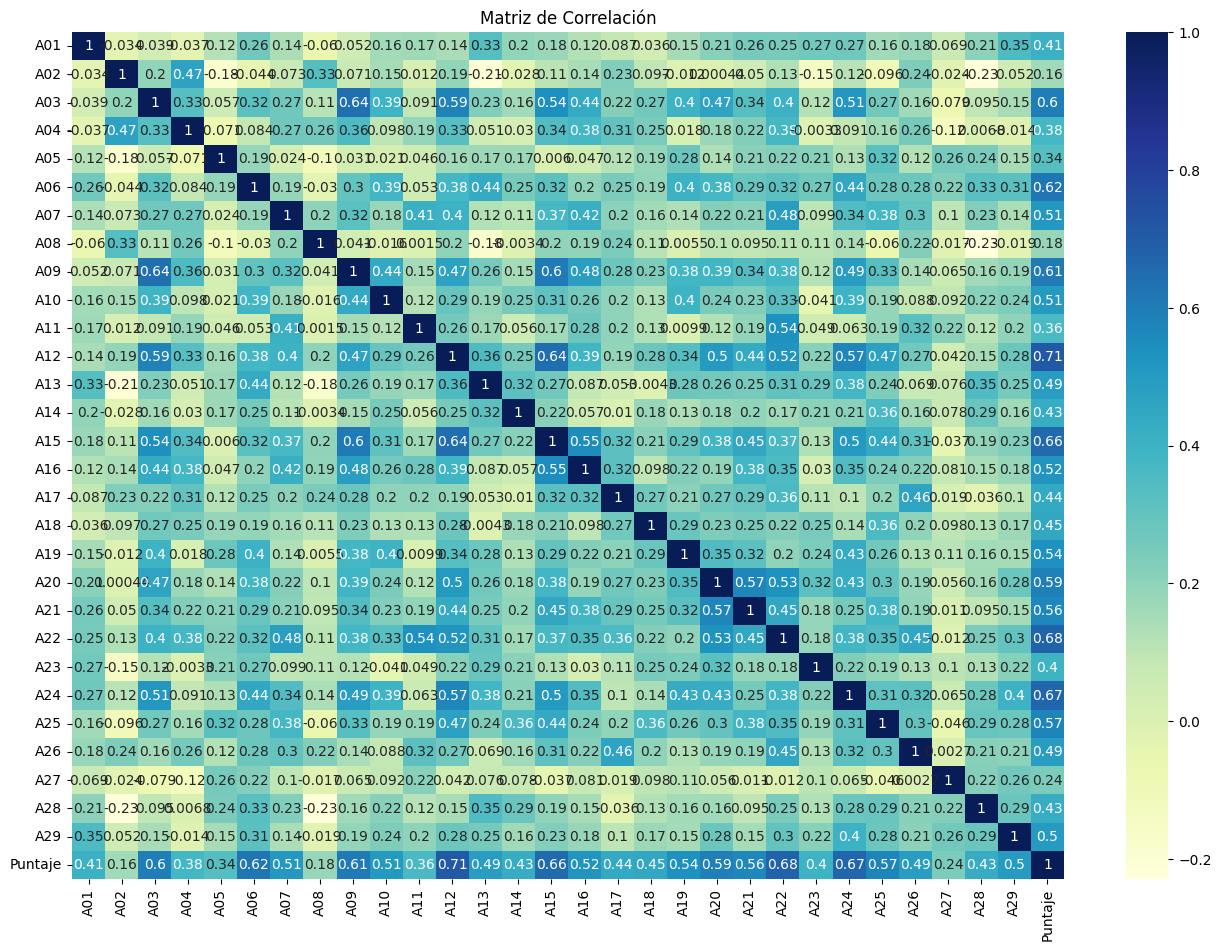

In [ ]:
matrix_df = ohq_df[['A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'A07', 'A08', 'A09',
       'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19',
       'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'Puntaje']]
corr = matrix_df.corr()

plt.figure(figsize=(16, 11))
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.title("Matriz de Correlaci√≥n")
plt.show()


Una matrix de correlaci√≥n es una representaci√≥n visual de la relaci√≥n lineal entre diferentes variables de un conjunto de datos

> **¬øC√≥mo leo el gr√°fico?**

Para leer un matriz de correlaci√≥n, observa la intensidad de los colores: los tonos m√°s oscuros o intensos indican una correlacion m√°s alta, mientras que los tonos m√°s claros representan una correlaci√≥n mas baja o neutra. Usa la escala de colores (leyenda a la derecha del grafico) para entender la correlaci√≥n de las variables.

```
Busca una combinaci√≥n de 2 columnas diferentes para saber como estas se correlacionan:

‚ñ∂ Valores cercanos a 1 : Indica una correlacion positiva fuerte. Cuando una variable aumenta, la otra tambi√©n tiende a aumentar.
‚ñ∂ Valores cercanos a 0 : Indica una correlaci√≥n d√©bil o nula. No existe una relaci√≥n lineal clara entre las variables.
‚ñ∂ Valores cercanos a -1: Indica una correlaci√≥n negativa fuerte.
Cuando una variable aumenta, la otra tiende a disminuir y biseversa.
```

*Nota: La diagonal principal siempre tiene valores 1, ya que cada variable est√° perfectamente correlacionada consigo misma.
Obviar estas celdas.*

Entre las correlaciones **mas altas** de la matrix se encuentran:
- Las preguntas **A15** y **A12**, con una correlaci√≥n positiva de **0.64**.

- Las preguntas **A09** y **A03**, con una correlaci√≥n positiva de **0.64**.

- Las preguntas **A09** y **A15**, con una correlaci√≥n positiva de **0.60**.

- La columna **Puntaje** tiene correlaciones superiores a **0.6** con las preguntas **A03, A06, A09, A12, A15, A22 y A24**.


---
Entre las correlaciones **mas bajas** de la matrix se encuentran:

-  La pregunta **A28**, que tiene una correlaci√≥n negativa de **-0.23** con las preguntas **A02** y **A08**.

- Las preguntas **A13 y A02** tienen una correlacion negativa de **-0.21**.

- Las preguntas **A13 y A08** tienen una correlacion negativa de **-0.18**.


---



‚õî **IMPORTANTE:** *Correlaci√≥n no implica causalidad. Estos valores solo indican la fuerza y direcci√≥n de una relaci√≥n lineal entre las variables, no que una cause la otra.*

> `viendo el promedio de respuestas por cada columna (agrupadas por cada categoria de felicidad) a trav√©s de un mapa de intesidad`

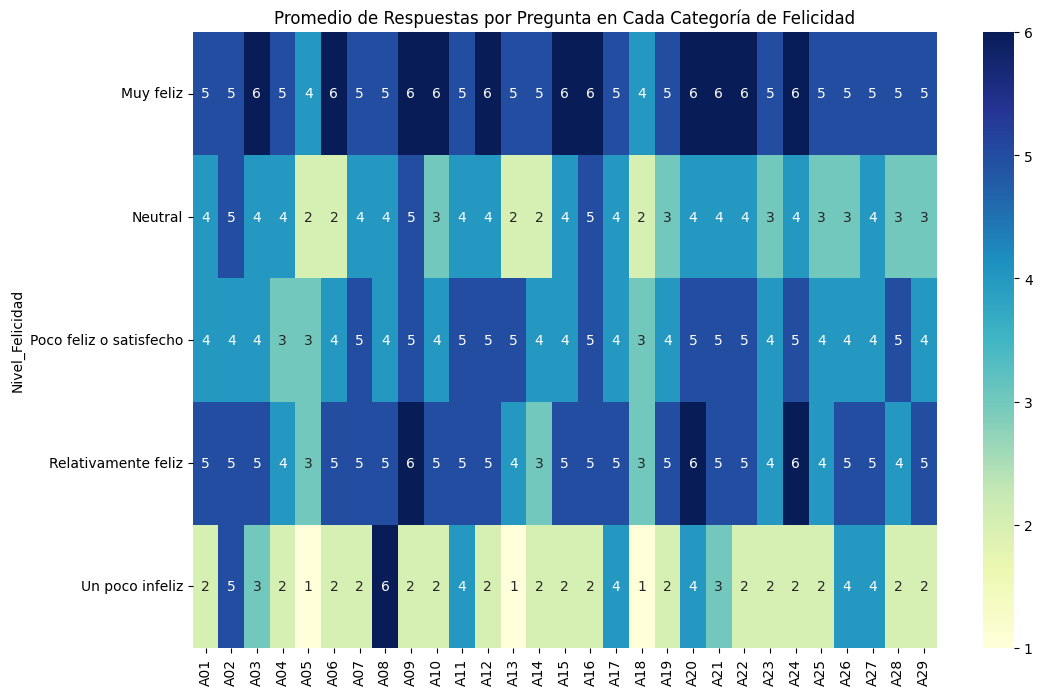

In [ ]:
avg_per_category = ohq_df[['A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'A07', 'A08', 'A09',
       'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19',
       'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'Nivel_Felicidad']].groupby('Nivel_Felicidad').mean()
avg_per_category = avg_per_category.apply(lambda x: round(x, 0))

plt.figure(figsize=(12, 8))
sns.heatmap(avg_per_category, annot=True, cmap="YlGnBu")
plt.title("Promedio de Respuestas por Pregunta en Cada Categor√≠a de Felicidad")
plt.show()



> **¬øC√≥mo leo el gr√°fico?**

Para leer un mapa de intensidad, observa la intensidad de los colores: los tonos m√°s oscuros o intensos indican valores m√°s altos, mientras que los tonos m√°s claros representan valores m√°s bajos. Usa la escala de colores (leyenda a la derecha del grafico) para entender el rango exacto de los datos.

```
Las columnas se encuentran debajo y las categorias de felicidad a la izquierda.
Busca una combinaci√≥n de columna - categoria para saber su respuesta promedio.
```

*Nota: Tener en cuenta aquellas columnas en las que las respuestas est√°n invertidas*




> **Resultados:**

**Relaci√≥n entre preguntas y felicidad:**

Se observa que, en general, las categor√≠as con mayor felicidad tienen respuestas promedio m√°s altas (celdas m√°s azules) en preguntas relacionadas con emociones positivas, como satisfacci√≥n, optimismo y disfrute.

Por ejemplo:

- Las preguntas como A09 ("La vida es muy bonita") y A12 ("Estoy muy satisfecho/a con mi vida") tienen puntajes consistentemente altos en esta categor√≠a.

- En contraste, preguntas como A06 ("No soy muy optimista respecto al futuro") y A19 ("Siento que no tengo mucho control sobre mi vida") tienen puntajes m√°s bajos, especialmente en las categor√≠as menos felices.

- Categor√≠as menos felices ("Poco Feliz"):
Estas muestran valores promedio m√°s bajos (celdas amarillas), indicando respuestas mas bajas.

**Diferencias notables entre categor√≠as:**

- Preguntas que reflejan grandes variaciones entre categor√≠as (contrastes claros en el heatmap):

- A15 ("Soy muy feliz") y A03 ("Creo que la vida es muy gratificante") tienen un incremento claro en el promedio conforme aumenta el nivel de felicidad.


**Preguntas con menos variaci√≥n:**

- Algunas preguntas, como A05 ("Pocas veces me levanto descansado/a"), muestran promedios m√°s consistentes entre categor√≠as, esto significa que las respuestas dpromedio som homogeneas en todas los niveles de felicidad.

- Pregunta A20 ("Me siento capaz de tomar decisiones") presenta valores promedio altos (> 4) en todas las categor√≠as.

- En contraste preguntas A05 y A18 ("Tengo tiempo para hacer todo lo que quiero") presentan valores bajos (< 4) en todas las categor√≠as de felicidad.

In [ ]:
columnas = ["A01", "A02", "A03", "A04", "A05", "A06", "A07", "A08", "A09", "A10",
             "A11", "A12", "A13", "A14", "A15", "A16", "A17", "A18", "A19", "A20",
             "A21", "A22", "A23", "A24", "A25", "A26", "A27", "A28", "A29"]

# Crear un diccionario para almacenar la distribuci√≥n de probabilidad
distribucion_probabilidad = {}

for col in columnas:
    # Calcular las frecuencias
    frecuencia = ohq_df[col].value_counts(normalize=True)  # `normalize=True` calcula las probabilidades directamente
    distribucion_probabilidad[col] = frecuencia

# Convertir a DataFrame para ver la distribuci√≥n de probabilidad
distribucion_probabilidad_df = pd.DataFrame(distribucion_probabilidad).fillna(0)  # Llena valores NaN con 0 si alguna respuesta falta

distribucion_probabilidad_df


A01    A02    A03    A04    A05    A06    A07    A08    A09    A10  ...  \
1  0.072  0.024  0.024  0.056  0.192  0.072  0.016  0.016  0.016  0.064  ...   
2  0.104  0.064  0.040  0.112  0.160  0.136  0.064  0.072  0.016  0.104  ...   
3  0.088  0.056  0.056  0.184  0.208  0.080  0.040  0.064  0.048  0.064  ...   
4  0.112  0.144  0.168  0.232  0.152  0.064  0.136  0.184  0.096  0.120  ...   
5  0.160  0.360  0.264  0.256  0.168  0.192  0.280  0.320  0.256  0.128  ...   
6  0.464  0.352  0.448  0.160  0.120  0.456  0.464  0.344  0.568  0.520  ...   

     A20    A21    A22    A23    A24    A25    A26    A27    A28    A29  
1  0.000  0.008  0.016  0.056  0.024  0.032  0.024  0.048  0.048  0.040  
2  0.008  0.000  0.016  0.192  0.040  0.080  0.040  0.072  0.136  0.120  
3  0.024  0.064  0.040  0.120  0.072  0.112  0.104  0.104  0.080  0.096  
4  0.072  0.160  0.160  0.120  0.024  0.216  0.296  0.080  0.088  0.072  
5  0.208  0.280  0.392  0.200  0.088  0.376  0.352  0.200  0.168  0.208  
6  0.688  0.488  0.376  0.312  0.752  0.184  0.184  0.496  0.480  0.464  

[6 rows x 29 columns]

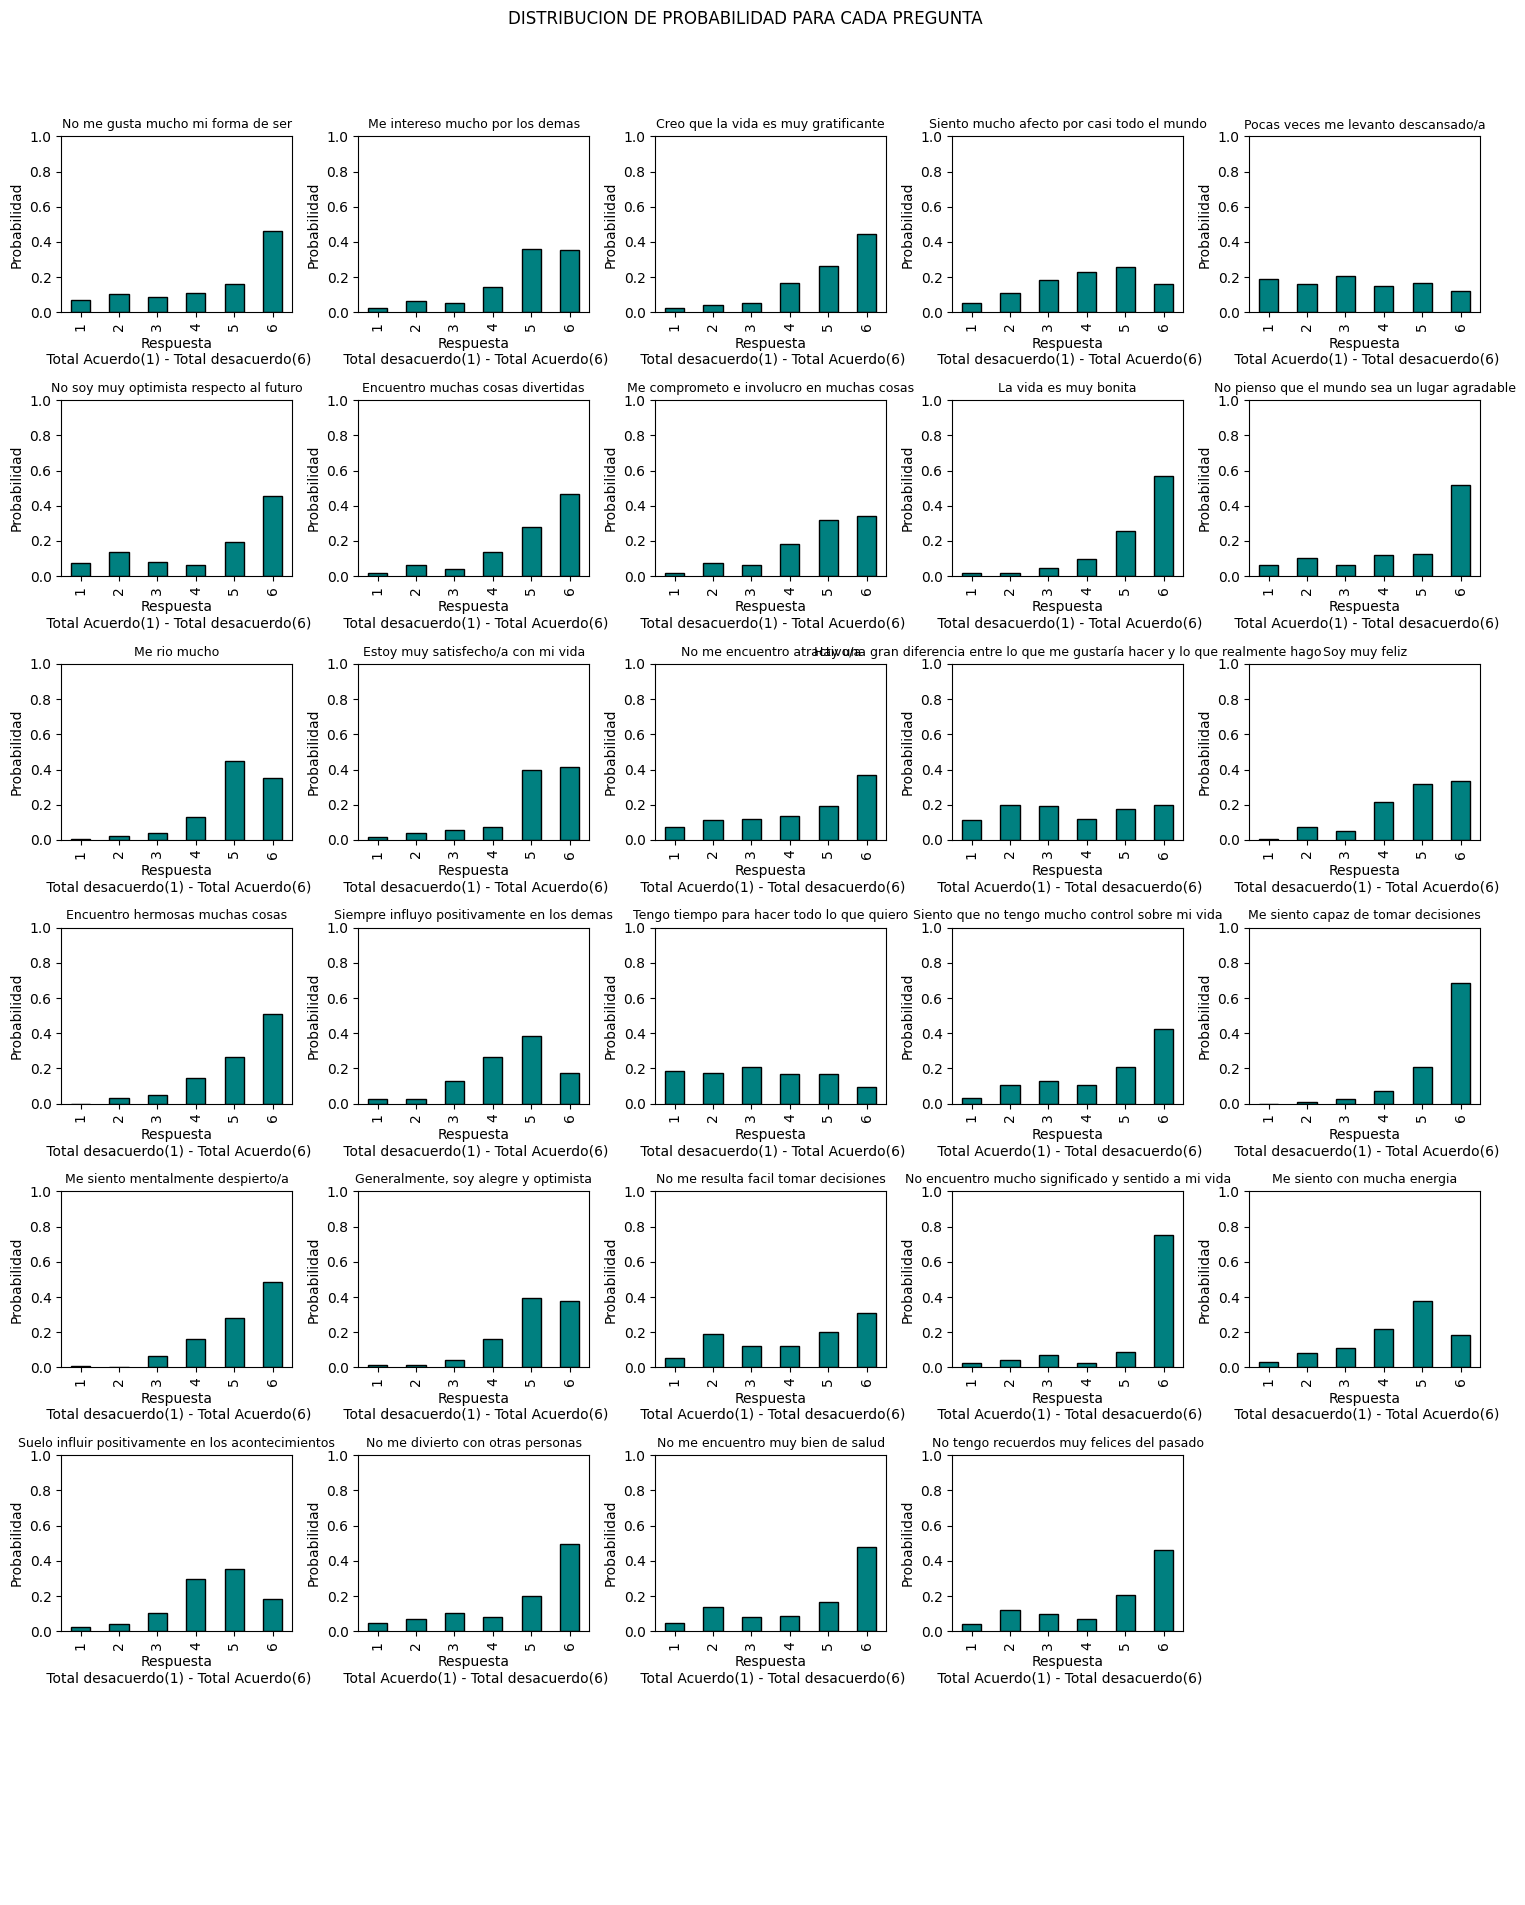

In [ ]:
# creando diccionario con la transcripcion de cada columna
preg = {"A01": "No me gusta mucho mi forma de ser",
               "A02": "Me intereso mucho por los demas",
               "A03": "Creo que la vida es muy gratificante",
               "A04": "Siento mucho afecto por casi todo el mundo",
               "A05": "Pocas veces me levanto descansado/a",
               "A06": "No soy muy optimista respecto al futuro",
               "A07": "Encuentro muchas cosas divertidas",
               "A08": "Me comprometo e involucro en muchas cosas",
               "A09": "La vida es muy bonita",
               "A10": "No pienso que el mundo sea un lugar agradable",
               "A11": "Me rio mucho",
               "A12": "Estoy muy satisfecho/a con mi vida",
               "A13": "No me encuentro atractivo/a",
               "A14": "Hay una gran diferencia entre lo que me gustar√≠a hacer y lo que realmente hago",
               "A15": "Soy muy feliz",
               "A16": "Encuentro hermosas muchas cosas",
               "A17": "Siempre influyo positivamente en los demas",
               "A18": "Tengo tiempo para hacer todo lo que quiero",
               "A19": "Siento que no tengo mucho control sobre mi vida",
               "A20": "Me siento capaz de tomar decisiones",
               "A21": "Me siento mentalmente despierto/a",
               "A22": "Generalmente, soy alegre y optimista",
               "A23": "No me resulta facil tomar decisiones",
               "A24": "No encuentro mucho significado y sentido a mi vida",
               "A25": "Me siento con mucha energia",
               "A26": "Suelo influir positivamente en los acontecimientos",
               "A27": "No me divierto con otras personas",
               "A28": "No me encuentro muy bien de salud",
               "A29": "No tengo recuerdos muy felices del pasado"}
# creando un subplot
fig, axes = plt.subplots(7, 5, figsize=(15, 20))
fig.suptitle("DISTRIBUCION DE PROBABILIDAD PARA CADA PREGUNTA")
axes = axes.flatten()
# creando un for loop para crear un grafico de dispersion por cada columna
for i, col in enumerate(columnas): #extrayendo el indice y nombre de columna
  for key, value in preg.items(): #extrayendo el nombre de columna y su transcripcion
    if key == col:
      distribucion = distribucion_probabilidad_df[col]

      distribucion.plot(kind='bar', ax=axes[i], color="teal", edgecolor="black") #creando el grafico de distribucion
      axes[i].set_title(f"{value}", fontsize=9) #estableciendo el titulo = afirmacion completa
      if col in ["A01", "A05", "A06", "A10", "A13", "A14", "A19", "A23", "A24", "A27", "A28", "A29"]: # columnas con valores invertidos
        axes[i].set_xlabel("Respuesta\n Total Acuerdo(1) - Total desacuerdo(6)")
      else:
        axes[i].set_xlabel("Respuesta\n Total desacuerdo(1) - Total Acuerdo(6)")
      axes[i].set_ylabel("Probabilidad")
      axes[i].set_ylim(0, 1)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # estableciendo espacio entre los graficos

plt.savefig("distribucion_prob.jpg", format='jpg', dpi=300, bbox_inches='tight')
plt.show()

#  APRETAR "MOSTRAR SALIDA OCULTA" PARA VER EL GRAFICO EN TAMA√ëO REAL, DEBAJO DE ESTA CELDA SE ENCUENTRA UNA IMAGEN DEL MISMO

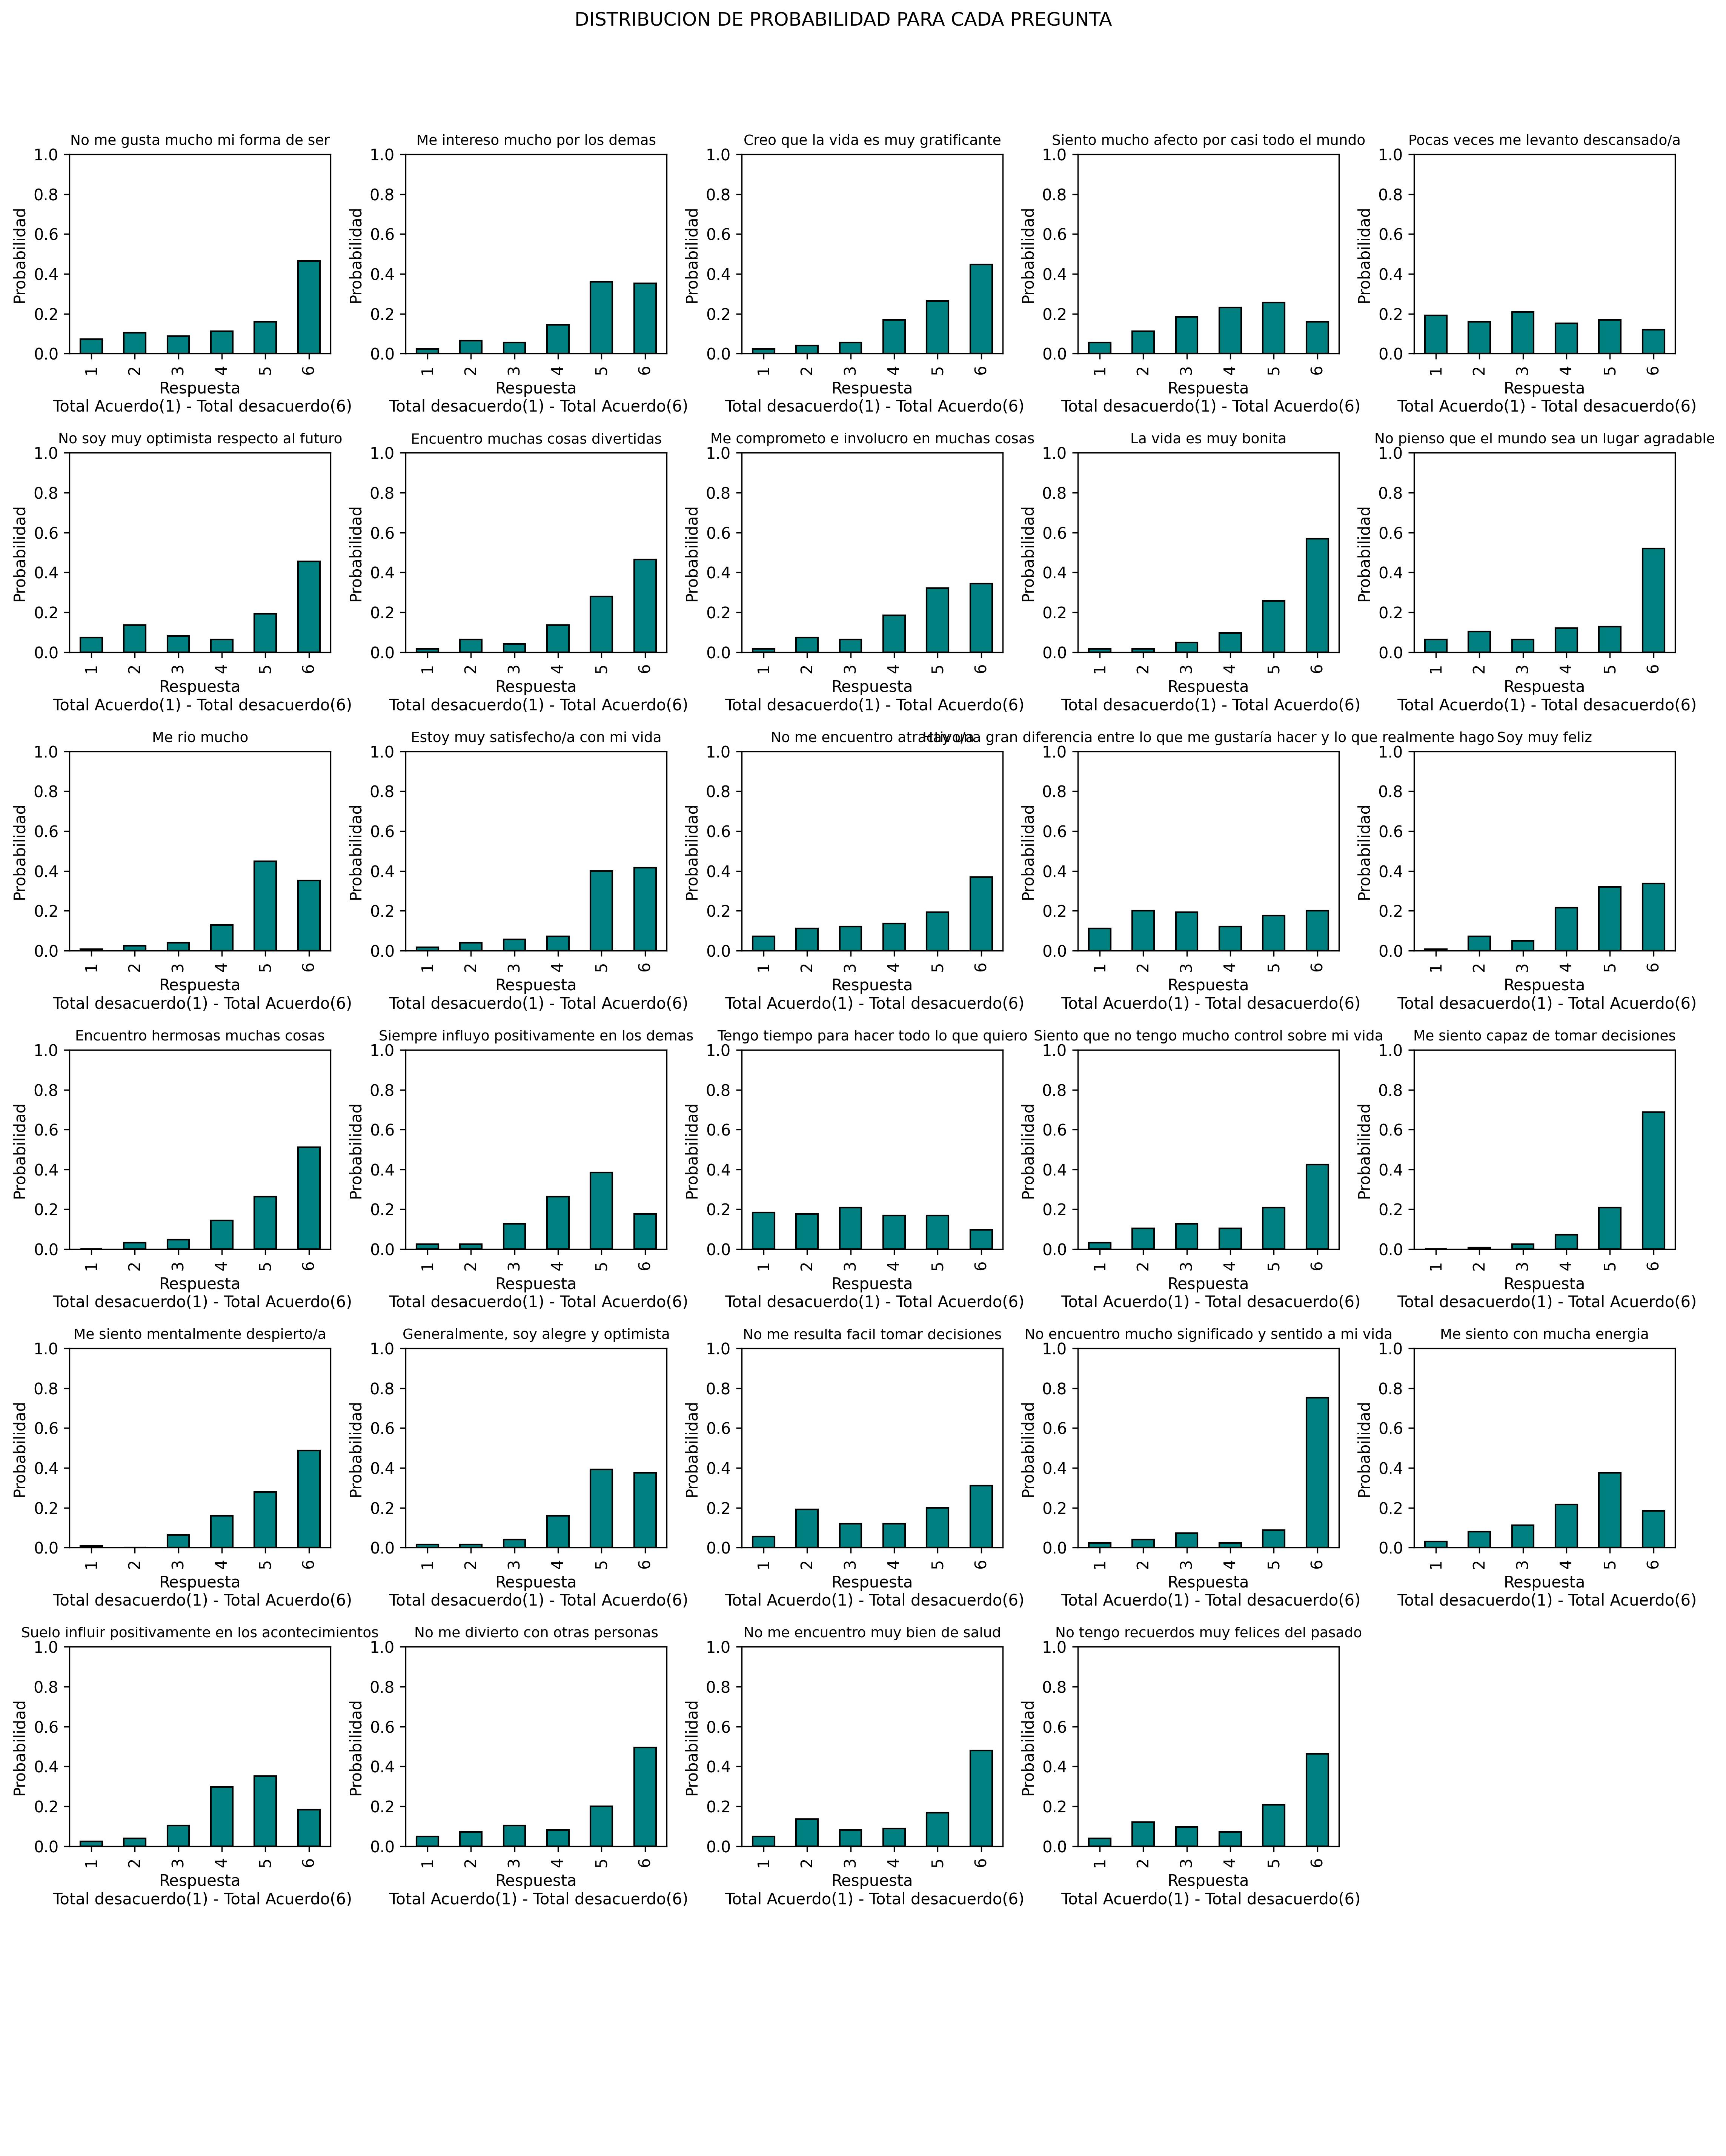

> **¬øC√≥mo leo el gr√°fico?**

Estos gr√°ficos muestran c√≥mo se distribuyen las respuestas de los encuestados para cada afirmaci√≥n del cuestionario, representando la probabilidad de cada categor√≠a de respuesta.

- **Eje X (horizontal)**: Representa las opciones de respuesta para cada afirmaci√≥n, que pueden ir desde "Total desacuerdo" (1) hasta "Total acuerdo" (6).
En las preguntas negativas, como "No me gusta mucho mi forma de ser" (A01), el eje X est√° invertido, mostrando "Total acuerdo (1) - Total desacuerdo (6)".

- **Eje Y (vertical)**: Representa la probabilidad estimada de que una respuesta caiga en cada categor√≠a. Los valores van de 0 a 1 (0% a 100%).

- Cada gr√°fico tiene como t√≠tulo la afirmaci√≥n completa de la pregunta.

- **Altura de la barra**: Muestra qu√© tan probable es que una respuesta est√© en esa categor√≠a. Una barra m√°s alta indica una mayor proporci√≥n de respuestas en esa categor√≠a.


---



> Interpretaci√≥n de gr√°ficos individualmente:

- En preguntas como "No le encuentro mucho significado a mi vida" y "Me siento capaz de tomar decisiones" se puede apreciar una **clara y gran diferencia entre la probabilidad** de que la respuesta sea 6 (Total desacuerdo y Total acuerdo respectivamente) y el resto de probabilidades.

- Por otro lado, en preguntas como "Tengo tiempo para hacer lo que quiero" y "Hay una gran diferencia entre lo que me gustar√≠a hacer y lo que realmente hago", **no es muy visible o marcada la diferencia entre las probabilidades**, es decir, que estas se encuentras distribuidas mas o menos equitativamente entre las distintas respuestas.

Este conjunto de gr√°ficos proporciona una visi√≥n visual y probabil√≠stica de c√≥mo los encuestados respondieron a cada afirmaci√≥n del cuestionario. Al observarlos, puedes identificar tendencias generales en la percepci√≥n de los encuestados y patrones que pueden ser √∫tiles para an√°lisis m√°s profundos.




> EDA: Explorando m√°s a profundidad cada columna



> `creando un grafico para ver la distribucion de la variable "Nivel_Felicidad"`

Nivel_Felicidad
Muy feliz                  43
Relativamente feliz        36
Poco feliz o satisfecho    29
Neutral                    15
Un poco infeliz             2
Name: count, dtype: int64


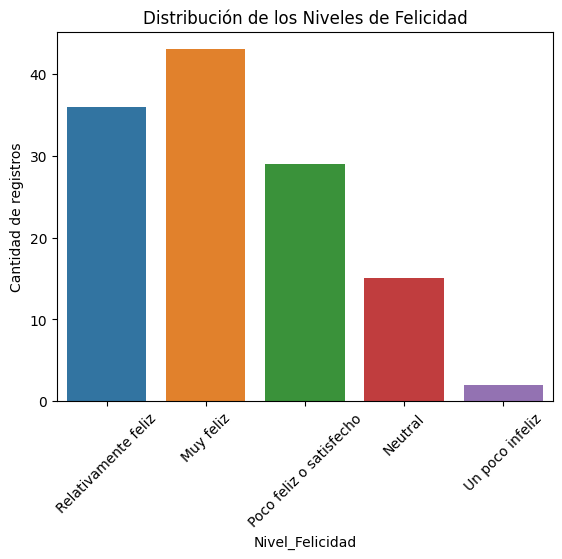

In [ ]:
print(ohq_df['Nivel_Felicidad'].value_counts())
sns.countplot(x='Nivel_Felicidad', data=ohq_df, hue="Nivel_Felicidad")
plt.ylabel("Cantidad de registros")
plt.title("Distribuci√≥n de los Niveles de Felicidad")
plt.xticks(rotation=45)
plt.show()


‚òë Primero podemos notar que **solo 5 de de 7 categorias se muestran en el gr√°fico**: "Relativamente Feliz", "Muy Feliz", "Poco Feliz", "Neutral" y "Un poco infeliz".
**"Infeliz" y "Demasiado Feliz" est√°n ausentes** en el gr√°fico.

Esto se debe a que los puntajes de los encuestados entran en un rango de 2.4 a 5.96, fuera de los rangos de estas ultimas dos categor√≠as, esto indica que no hay valores extremos entre los puntajes de los encuestados, sino m√°s bien balanceados entre las categorias del centro.

‚òë  43 de 125 individuos entran dentro de la categoria **"Muy Feliz"**, reflejando un **34.4%** del total.

‚òë 36 individuos entran dentro de la categoria **"Relativamente Feliz"**, reflejando el **28.8%** de la poblacion total.

‚òë 29 individuos entran dentro de la categoria **"Poco feliz"**, reflejando un **23.2%** del total.

‚òë 15 de los individuos entran dentro de la categoria **"Neutral"**, siendo estos el **12%** del total.

‚òë Solo 2 de 125 individuos entran dentro de la categoria **"Un poco infeliz"**, conformando estos el **1.6%** de la poblaci√≥n.


```
# creando un grafico de puntos para visualizar la distribucion de la columna "Puntaje"
```



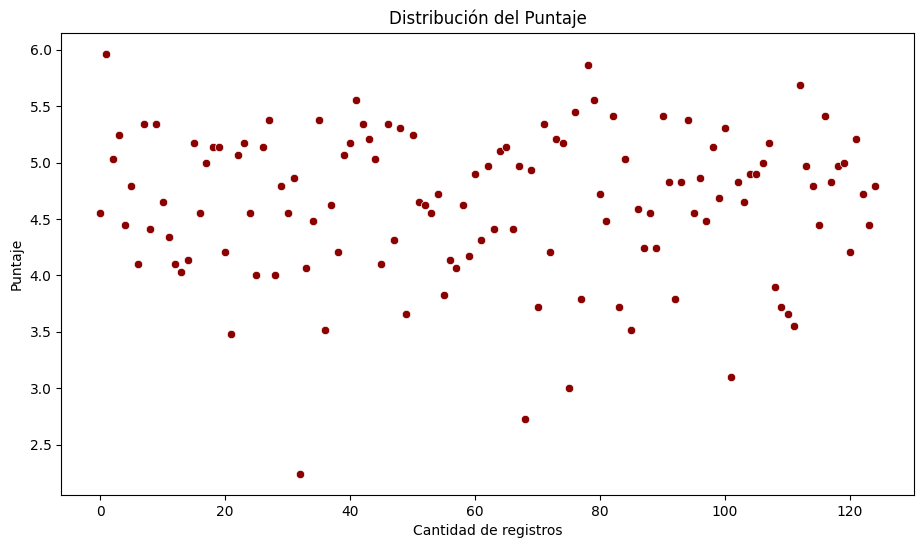

In [ ]:
plt.figure(figsize=(11, 6))
sns.scatterplot(ohq_df["Puntaje"], color="darkred")
plt.xlabel("Cantidad de registros")
plt.ylabel("Puntaje")
plt.title("Distribuci√≥n del Puntaje")
plt.show()



> **Resultados:**

Se puede apreciar que los puntos en el gr√°fico no forman una figura en especifico, sino que mas bien se encuentran esparcidos por todo el gr√°fico sin presentar patrones. A su vez, la mayoria de los puntos se encuentran por encima de un puntaje de 3.5 y por debajo de un puntaje de 5.5.

Esto quiere decir que los individuos han obtenido puntajes relativamente diferentes, y que no hay puntajes en especifico que predominen mas que el resto en el conjunto de datos, pero si hay puntajes que no se ven con tanta frecuencia (valores atipicos, fuera de los valores promedio).







```
# creando un grafico de cajas y bigotes para visualizar la distribucion de "Puntaje" seg√∫n "Nivel_Felicidad"
```



<ipython-input-15-8f4abc0f2b8d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Nivel_Felicidad', y='Puntaje', data=ohq_df, palette="YlGnBu")


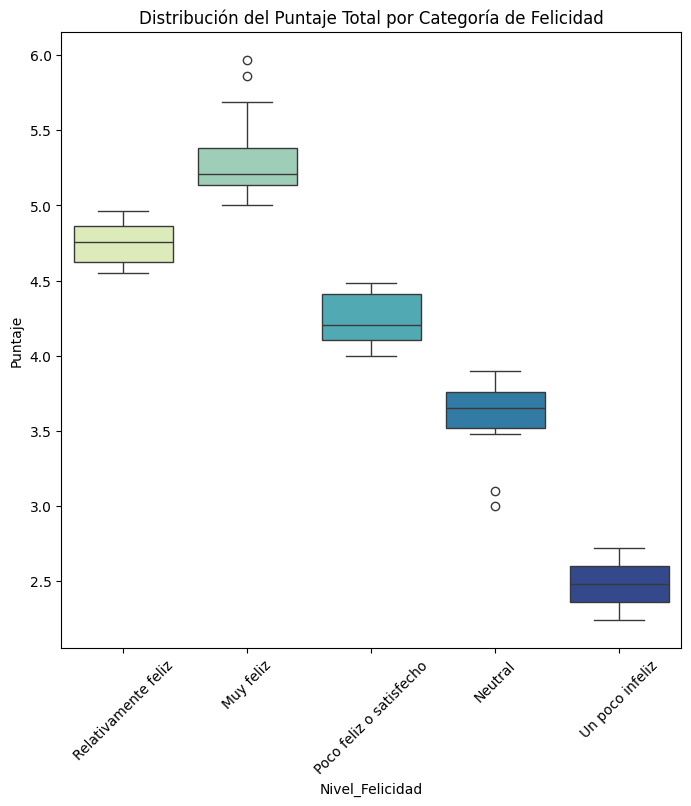

In [ ]:
plt.figure(figsize=(8, 8))
sns.boxplot(x='Nivel_Felicidad', y='Puntaje', data=ohq_df, palette="YlGnBu")
plt.title("Distribuci√≥n del Puntaje Total por Categor√≠a de Felicidad")
plt.xticks(rotation=45)
plt.show()


> **¬øC√≥mo leo el gr√°fico?**

```
Los graficos de cajas te permiten visualizar r√°pidamente la dispersi√≥n, la asimetr√≠a y la presencia de valores at√≠picos.

‚ñ∂ Caja: Representa el rango intercuart√≠lico (IQR), que contiene el 50% central de los datos.
Un IQR grande indica una mayor dispersi√≥n de los datos, mientras que un IQR peque√±o indica una menor dispersi√≥n.

‚ñ∂ L√≠nea central de la caja: Representa la mediana, es decir, el valor que divide los datos en dos partes iguales.
Si la mediana est√° m√°s cerca del borde inferior de la caja, la distribuci√≥n es asim√©trica positiva (cola hacia la derecha).
Si la mediana est√° m√°s cerca del borde superior, la distribuci√≥n es asim√©trica negativa.

‚ñ∂ Bigotes: Se extienden desde la caja hasta los valores m√°s extremos que a√∫n se consideran dentro de un rango razonable.

‚ñ∂Puntos aislados: Representan los valores at√≠picos, que est√°n muy alejados del resto de los datos.
```




> **Resultados:**

El gr√°fico de distribuci√≥n muestra que hay una clara tendencia en los datos: entre m√°s alto el puntaje del encuestado, este entra en una categoria m√°s alta.

- Categor√≠a **"Neutral**":
Hay algunos valores fuera del rango de los bigotes, lo que indica la presencia de puntos at√≠picos en los valores m√°s bajos razonables del puntaje.

- Categor√≠a **"Muy Feliz"**:
Tambi√©n presenta algunos puntos at√≠picos hacia los valores m√°s bajos del puntaje. La distribuci√≥n es asim√©trica positiva, con una concentraci√≥n de puntajes m√°s cerca del l√≠mite inferior.

- Categor√≠a **"Poco Feliz"**:
Muestra una distribuci√≥n asim√©trica positiva, con puntajes m√°s concentrados hacia los valores inferiores del rango, aunque tambi√©n hay at√≠picos.


---


El gr√°fico sugiere que el puntaje total del cuestionario est√° relacionado de manera positiva con los niveles de felicidad. Sin embargo, la presencia de puntos at√≠picos y distribuciones asim√©tricas en algunas categor√≠as indica que ciertos individuos pueden no encajar perfectamente en los rangos esperados para su nivel de felicidad.




 # **Conclusiones, recomendaciones y siguientes pasos**


---
El an√°lisis del **cuestionario de felicidad de Oxford** proporcion√≥ una visi√≥n inicial sobre c√≥mo los empleados del **Consejo Provincial de Educacion de Neuqu√©n** perciben su bienestar emocional y mental.

- Los encuestados mostraron un alto nivel de acuerdo con preguntas relacionadas con la satisfacci√≥n con la vida y el **optimismo**, mientras que las preguntas que eval√∫an percepciones negativas (como la autocr√≠tica o el control sobre la vida) presentaron un poco m√°s de variabilidad.

- Los resultados reflejaron **niveles significativamente mayores** de acuerdo con afirmaciones relacionadas con autoestima, significado de vida y percepci√≥n de logro personal.

- **No se vieron resultados** promedios que sean **alarmantes ni muy bajos**, a pesar de que hubieron preguntas con respuestas promedio m√°s bajas, no indica que los individuos encuestados perciban su vida o bien estar negativamente.


A pesar de estos hallazgos, el actual conjunto de datos limita considerablemente el alcance del an√°lisis, siendo restringido a observaciones generales que no pueden ser utilizadas para dise√±ar estrategias personalizadas.

Los datos se recolectaron de forma an√≥nima, por lo que no se cuenta con informaci√≥n contextual demogr√°fica o laboral de los encuestados. Esto **impide identificar patrones** espec√≠ficos entre grupos, **comprobar o rechazar** posbiles **hipotesis**, **realizar modelos estadisticos** m√°s avanzados o utilizar Machine Learning para **predecir variables**.


Otra importante limitaci√≥n para el an√°lisis implica la **imputaci√≥n de las respuestas a mano**, dando oportunidad a errores como preguntas con m√°s de una respuesta o preguntas dejadas en blanco. Las respuestas inconsistentes no sirven para el an√°lisis y deben ser retiradas, para evitar p√©rdida de valiosos datos es preferible evitar la imputaci√≥n de respuestas a mano.

Como siguientes pasos para conseguir un mejor an√°lisis en proximos avances del proyecto, se recomienda:

 üí° **Implementar** una pr√≥xima ronda de cuestionarios que incluya **preguntas sobre sexo, edad, estado civil, hijos**, profesi√≥n, jornada laboral, antig√ºedad, departamento al que pertenece, **entre otros**.

 üí° **Implementar el uso de cuestionarios online** para automatizar el ingreso y procesamiento de los datos.

 üí° Centralizar los datos en una **base de datos relacional** (como MySQL o PostgreSQL) facilitar√° la gesti√≥n de informaci√≥n y permitir√°:

1. Realizar consultas complejas y an√°lisis detallados con mayor rapidez.
Comparar datos hist√≥ricos con nuevas rondas de encuestas.
2. Identificar tendencias longitudinales que reflejen mejoras o √°reas de preocupaci√≥n en el bienestar de los empleados.

üí° **Dise√±ar un dashboard interactivo**. Crear un dashboard visual que permite explorar los datos en tiempo real y filtrar por variables clave, dando mejor entendimiento de los hallazgos.

üí° **Desarrollar una presentaci√≥n de diapositivas** para compartir los hallazgos y recomendaciones, evitando bloques de c√≥digo dif√≠ciles de entender y enfatizando c√≥mo los hallazgos pueden impactar positivamente en el bienestar emocional de los empleados y, en consecuencia, en la productividad y satisfacci√≥n laboral.

üí° Utilizar el cuestionario digital junto con la base de datos para realizar un futuro **an√°lisis longitudinal**, identificando si las iniciativas implementadas logran mejoras significativas en los niveles de felicidad reportados.



# **Referencias**


---

- [Documentaci√≥n oficial de Python](https://docs.python.org/es/3/)

- [Documentaci√≥n oficial de Pandas](https://pandas.pydata.org/docs/)